## <div align="center"> FINAL EXAM ODD SEMESTER ACADEMIC YEAR 2024/2025 </div>
## <div align="center"> INFORMATION SYSTEM STUDY PROGRAM  </div>
#### <div align="center"> Semester Ganjil 2023/2024 </div>
---

---

### Enter Code Here:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Question 1: Gather open-source datasets to acquire the data with the following criteria:

#### The dataset should have at least 1,000 rows and 10 columns, and should be no older than 5 years.

#### The dataset should be in CSV, XLSX, or JSON format.

In [4]:
# Mengimpor tabel CSV 
data = pd.read_csv("Drug_Consumption.csv")

Link: https://www.kaggle.com/datasets/mexwell/drug-consumption-classification

In [7]:
# Melihat jumlah baris data (apakah data memiliki baris dan kolom sesuai permintaan)
num_rows = data.shape
print(f"Jumlah row (baris) dalam dataset: {num_rows}")

Jumlah row (baris) dalam dataset: (1884, 32)


In [9]:
# Melihat informasi 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

#### The dataset should contain both numeric and categorical variables.

In [12]:
# Melihat head dari dataset untuk mengecek apakah sudah ada kategori dan numerik
data.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [14]:
# Melihat tail dari data
data.tail(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1883,1888,18-24,M,"Some college or university, no certificate or ...",Republic of Ireland,White,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Question 2: Data Processing and Visualization

#### Handling Missing Values, Handling Outliers, Normalization, Binning, Encoding, Grouping

In [18]:
# Melihat apakah ada duplikasi data

duplicates = data[data.duplicated()]

print(f"Jumlah baris yang duplikat: {duplicates.shape[0]}")

if duplicates.shape[0] > 0:
    print("\nBaris duplikat:")
    duplicates
else:
    print("\nTidak ada baris duplikat ditemukan.")

Jumlah baris yang duplikat: 0

Tidak ada baris duplikat ditemukan.


In [20]:
# Melihat apakah ada Missing Values
print("\nJumlah missing values:")
data.isnull().sum()


Jumlah missing values:


ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Dari data di atas bisa kita lihat tidak terdapat missing values. 

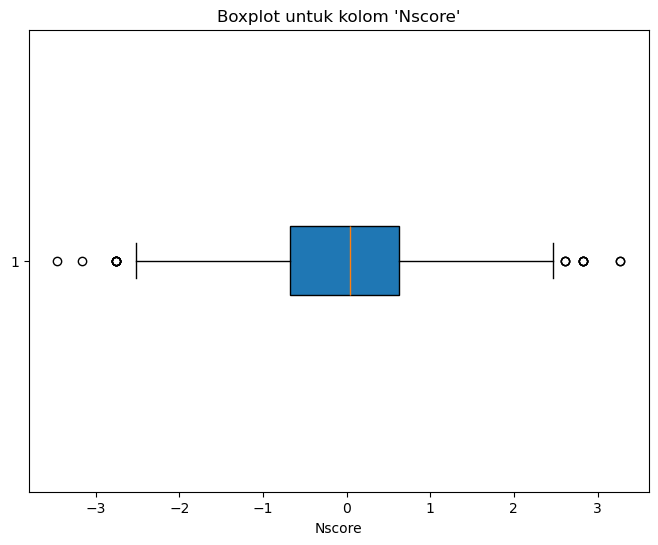

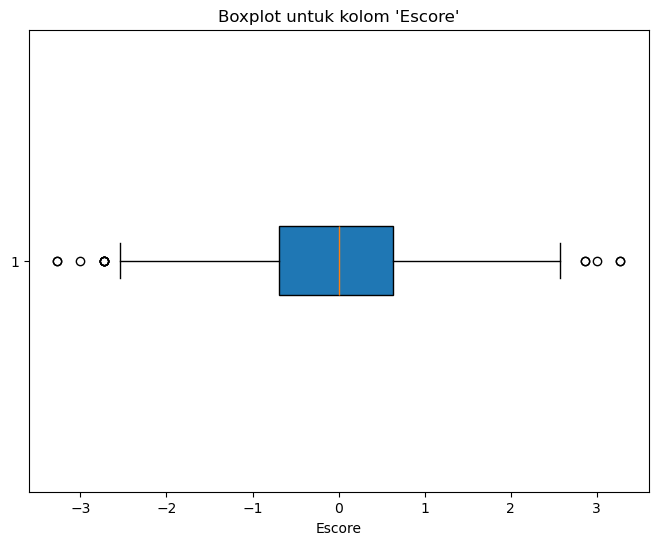

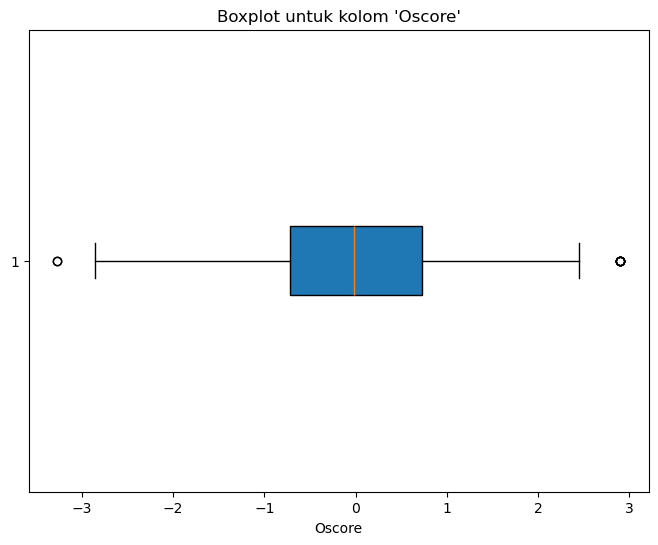

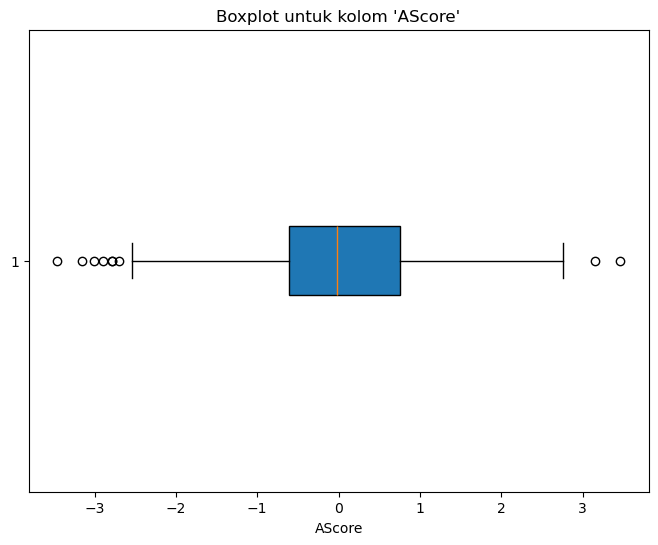

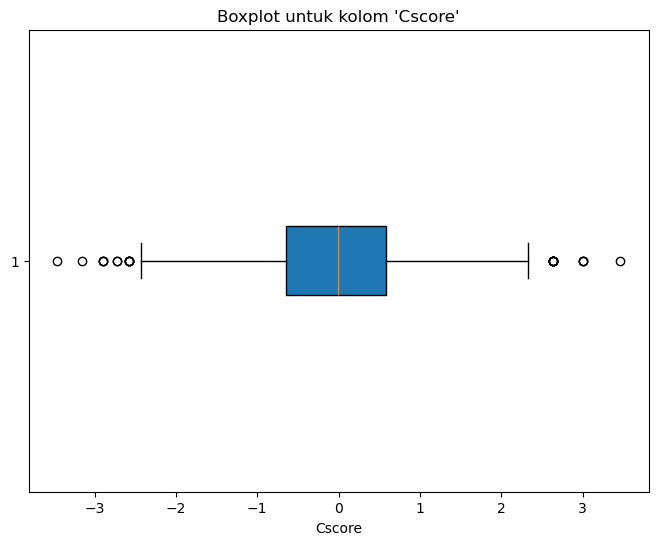

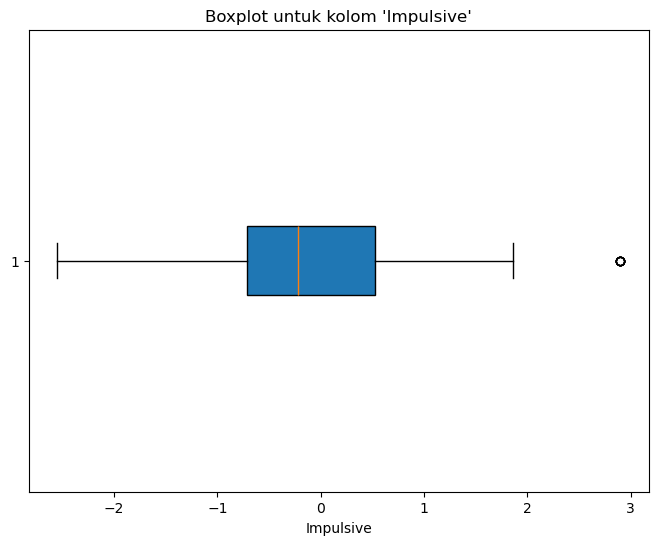

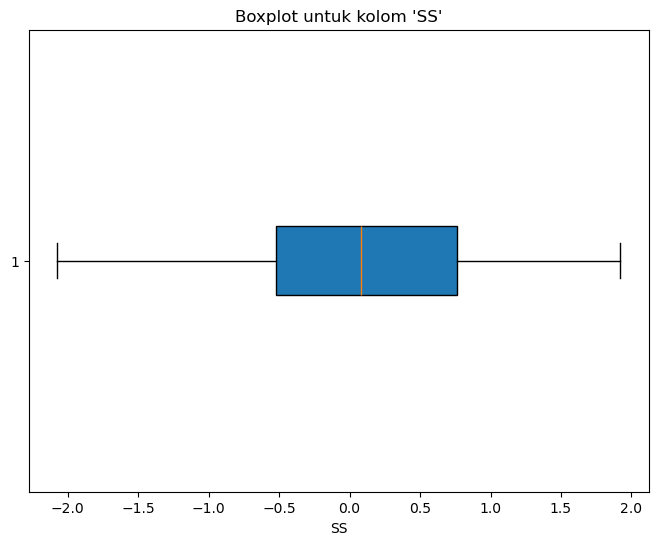

In [23]:
# Mengecek Outlier
numeric_columns = data.select_dtypes('float64').columns

outlier_info = {}

for column in numeric_columns:
    # Menghitung Q1, Q3, dan IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menemukan outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_info[column] = len(outliers)

    # Membuat Boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot untuk kolom '{column}'")
    plt.xlabel(column)
    plt.show()

In [24]:
# Menampilkan informasi jumlah outlier per kolom

print("\nJumlah outlier per kolom:")
for column, count in outlier_info.items():
    print(f"{column}: {count} outlier")


Jumlah outlier per kolom:
Nscore: 19 outlier
Escore: 14 outlier
Oscore: 9 outlier
AScore: 9 outlier
Cscore: 24 outlier
Impulsive: 7 outlier
SS: 0 outlier


In [25]:
# Menangani Outlier dengan mengganti batas bawah/atas
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier
    data[column] = data[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

# Menampilkan data setelah penanganan outlier
print("\nData setelah penanganan outlier:")
data.head()


Data setelah penanganan outlier:


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [29]:
# Menghitung ulang jumlah outlier setelah penanganan
outlier_info_after = {}

for column in numeric_columns:
    # Menghitung ulang batas bawah dan atas
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menemukan outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_info_after[column] = len(outliers)

# Menampilkan jumlah outlier per kolom setelah penanganan
print("\nJumlah outlier per kolom setelah penanganan:")
for column, count in outlier_info_after.items():
    print(f"{column}: {count} outlier")



Jumlah outlier per kolom setelah penanganan:
Nscore: 0 outlier
Escore: 0 outlier
Oscore: 0 outlier
AScore: 0 outlier
Cscore: 0 outlier
Impulsive: 0 outlier
SS: 0 outlier


In [31]:
# Normalization

scaler = MinMaxScaler()
numeric_columns = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("Data setelah normalisasi:")
data[numeric_columns].head()

Data setelah normalisasi:


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,0.375000,0.869034,0.748567,0.625000,0.477988,0.372784,0.465658
1,0.415331,0.656406,0.352431,0.189493,0.301870,0.237624,0.619957
2,0.476197,0.354169,0.496131,0.593818,0.625000,0.237624,0.224398
3,0.645219,0.199007,0.421081,0.430696,0.770712,0.472681,0.465658
4,0.375000,0.449043,0.229582,0.858813,0.836325,0.237624,0.132468


C:\Users\ACER\AppData\Local\Temp\ipykernel_11852\3378334119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age', palette='dark:#00569e', order=age_order)  # Tambahkan `data=data`


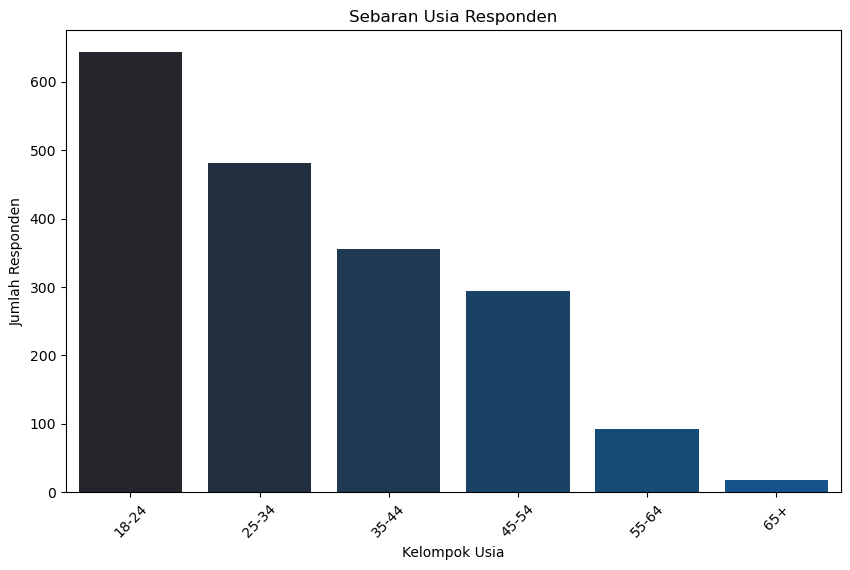

In [33]:
# Melakukan Binning
# Membuat kategori terurut untuk kolom Age
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age'] = pd.Categorical(data['Age'], categories=age_order, ordered=True)

# Membuat plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age', palette='dark:#00569e', order=age_order)  # Tambahkan `data=data`
plt.title('Sebaran Usia Responden')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Grouping berdasarkan Age

grouped_data = data.groupby('Age')[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']].mean()

print("Data setelah grouping:")
grouped_data

Data setelah grouping:


C:\Users\ACER\AppData\Local\Temp\ipykernel_11852\1495264031.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('Age')[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']].mean()


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
Age,,,,,,,
18-24,0.526974,0.508875,0.554491,0.468869,0.453779,0.568977,0.619502
25-34,0.517264,0.516213,0.493865,0.491822,0.520967,0.512087,0.522385
35-44,0.502556,0.488492,0.453892,0.482424,0.533968,0.482998,0.447045
45-54,0.465316,0.508966,0.460320,0.521727,0.550649,0.466630,0.426322
55-64,0.432568,0.494031,0.469414,0.478435,0.532272,0.502397,0.419394
65+,0.418745,0.421972,0.380496,0.471052,0.626097,0.430896,0.278143


#### Select at least five types of data visualizations (e.g., scatter plots, histograms, box plots, bar charts, line charts, etc.) and explain how each can effectively represent the data. Justify your choice of visualization for different aspects of the dataset, such as relationships, distributions, trends, and comparisons. Describe the insights that each type of visualization can provide and how they contribute to your overall data analysis

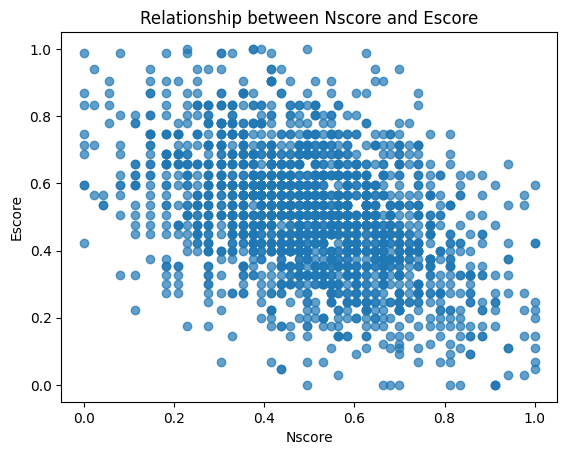

In [16]:
# Scatter Plot untuk melihat hubungan antara NScore dan Escore 

plt.scatter(data['Nscore'], data['Escore'], alpha=0.7)
plt.title('Relationship between Nscore and Escore')
plt.xlabel('Nscore')
plt.ylabel('Escore')
plt.show()

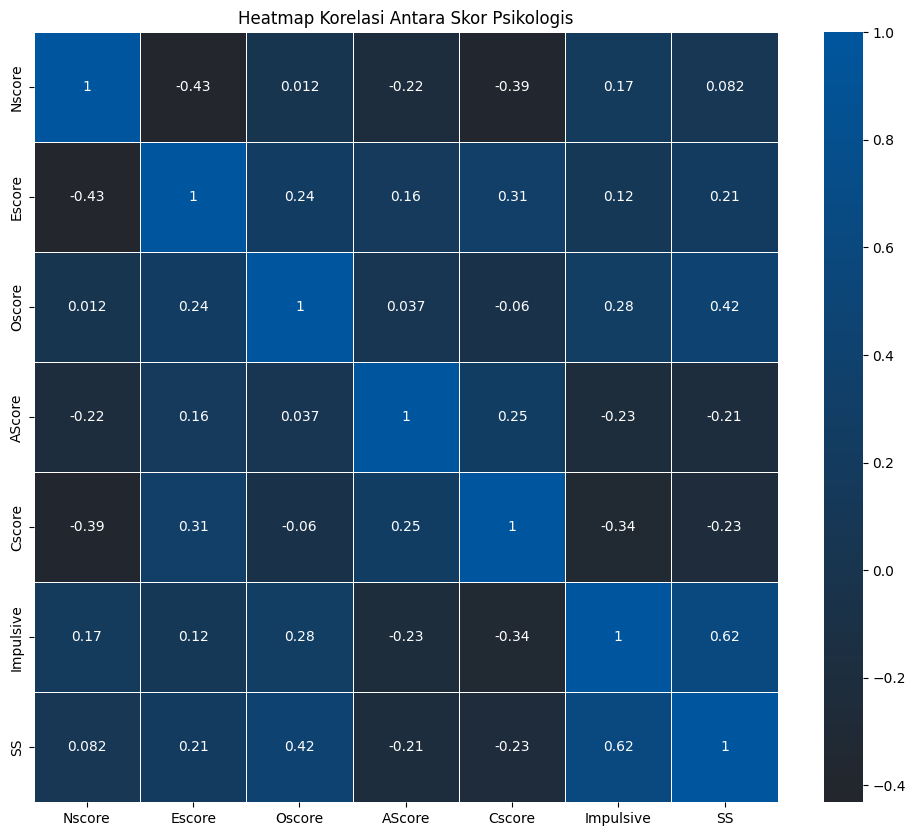

In [17]:
plt.figure(figsize=(12, 10))
custom_palette = sns.color_palette('dark:#00569e', as_cmap=True)
sns.heatmap(data[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']].corr(), annot=True, cmap=custom_palette, linewidths=0.5)
plt.title('Heatmap Korelasi Antara Skor Psikologis')
plt.show()

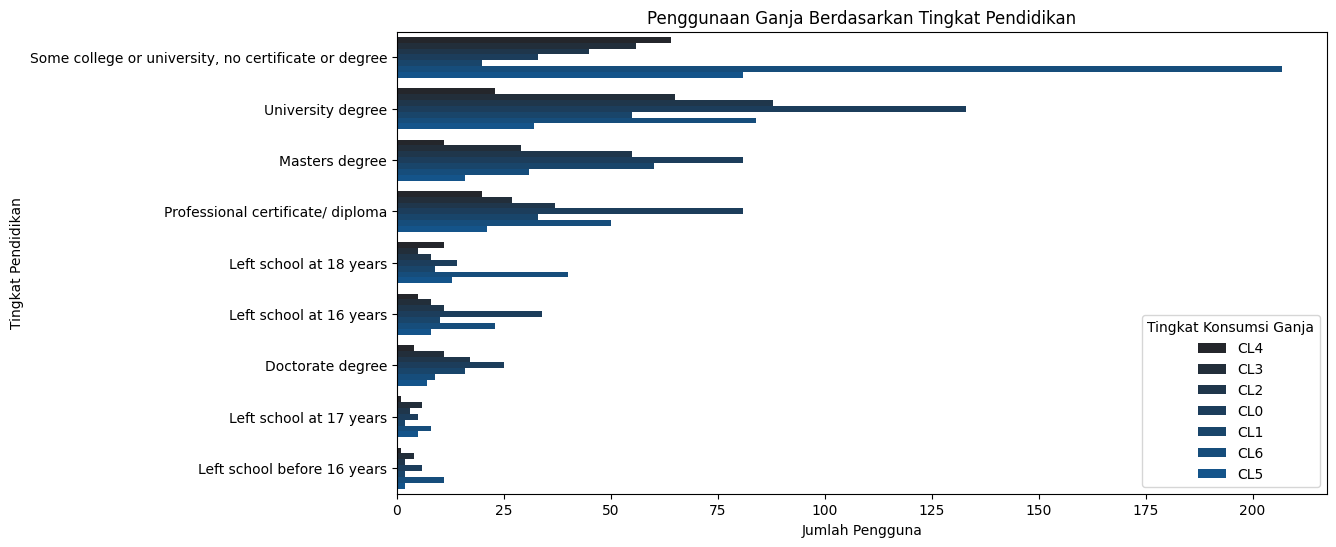

In [18]:

plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,  
    y='Education',
    hue='Cannabis',
    palette='dark:#00569e',
    order=data['Education'].value_counts().index
)
plt.title('Penggunaan Ganja Berdasarkan Tingkat Pendidikan')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Tingkat Pendidikan')
plt.legend(title='Tingkat Konsumsi Ganja', loc='lower right')
plt.show()

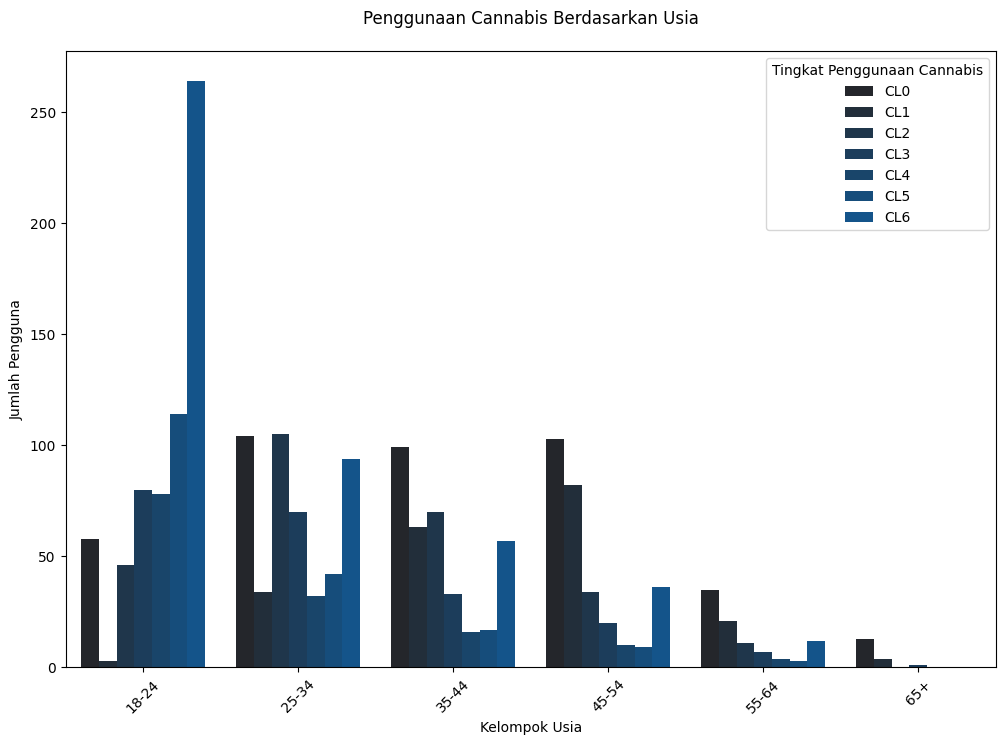

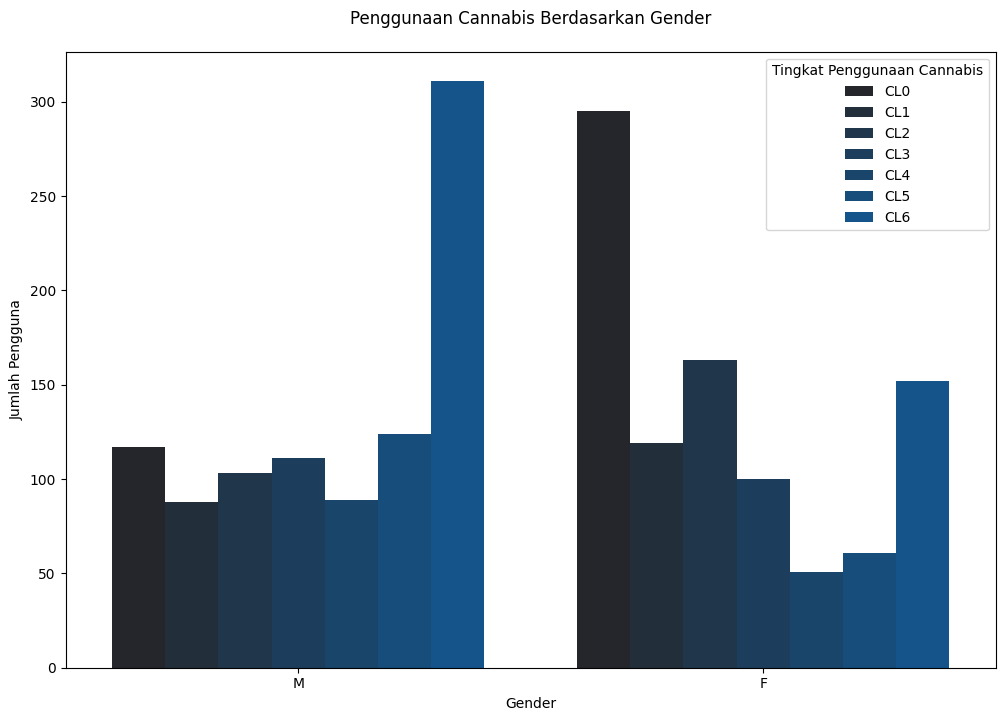

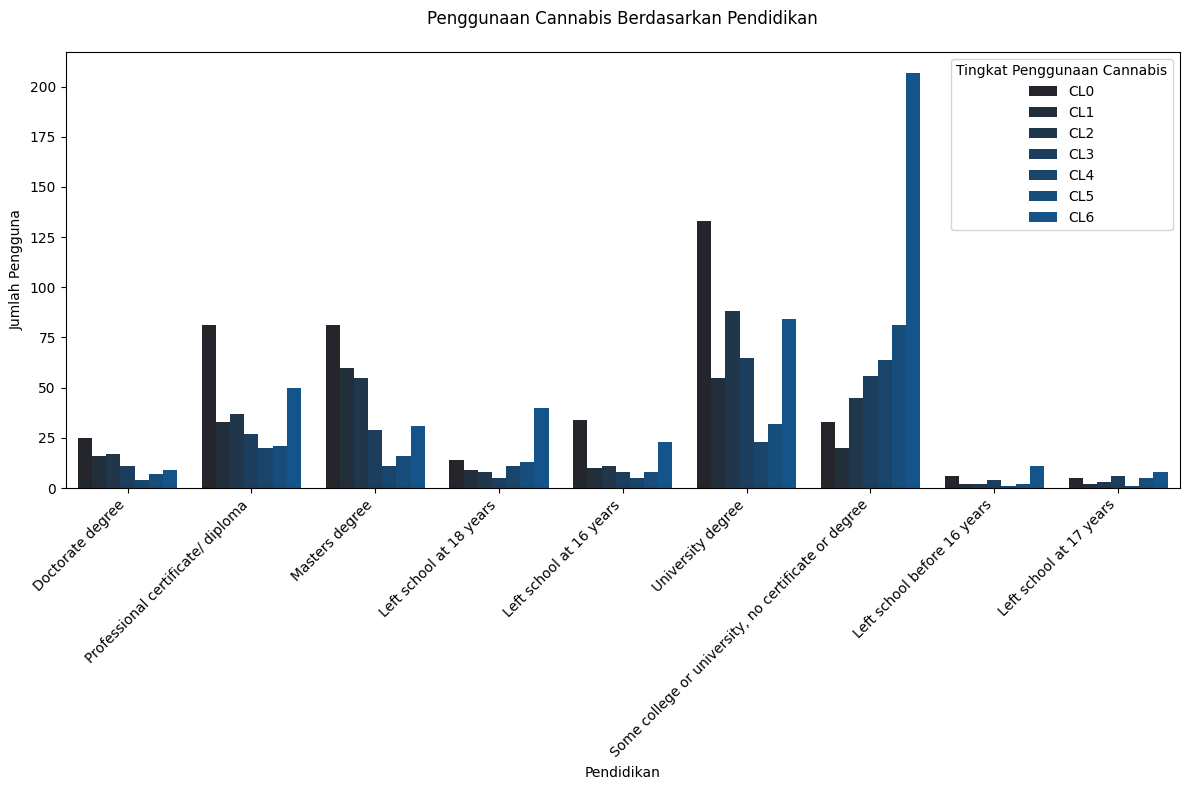

In [19]:
cannabis_order = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
data['Cannabis'] = pd.Categorical(data['Cannabis'], categories=cannabis_order, ordered=True)

# Plot Penggunaan Cannabis Berdasarkan Usia
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Age', hue='Cannabis', palette='dark:#00569e', order=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plt.title('Penggunaan Cannabis Berdasarkan Usia', pad=20)
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Tingkat Penggunaan Cannabis')
plt.xticks(rotation=45)
plt.savefig('Penggunaan Cannabis Berdasarkan Usia.jpg', format='jpg', dpi=300)
plt.show()

# Plot Penggunaan Cannabis Berdasarkan Gender
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Gender', hue='Cannabis', palette='dark:#00569e')
plt.title('Penggunaan Cannabis Berdasarkan Gender', pad=20)
plt.xlabel('Gender')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Tingkat Penggunaan Cannabis')
plt.savefig('Penggunaan Cannabis Berdasarkan Gender.jpg', format='jpg', dpi=300)
plt.show()

# Plot Penggunaan Cannabis Berdasarkan Pendidikan
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Education', hue='Cannabis', palette='dark:#00569e')
plt.title('Penggunaan Cannabis Berdasarkan Pendidikan', pad=20)
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Tingkat Penggunaan Cannabis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Penggunaan Cannabis Berdasarkan Pendidikan.jpg', format='jpg', dpi=300)
plt.show()

### Question 3: Machine Learning

In [4]:
# Preprocessing Data
personality_features = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']#personaliti pengguna
demographic_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']#info demografis pengguna
df_encoded = pd.get_dummies(data[demographic_features + personality_features])#menggunakan one hot encoding untuk menggabungkan kedua group
df_encoded['Cannabis_Target'] = data['Cannabis'].apply(lambda x: 1 if x != 'CL0' else 0) #encode CL0(Bukan Pengguna narkoba) Menjadi 0 dan 
#CL1-CL5 Menjadi 1 (Pengguna Narkoba)
# Split Features and Target
X = df_encoded.drop('Cannabis_Target', axis=1)
y = df_encoded['Cannabis_Target']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% untuk data testing, sisanya 80% untuk data training.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# fungsi tersebut digunakan untuk menstandarisasi data agar semua fitur memiliki skala yang sama (mean = 0, standar deviasi = 1).
# Memastikan seluruhnya dalam skala yang sama.


In [6]:
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error

In [8]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Evaluasi MAE dan MSE
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print("SVM Mean Absolute Error (MAE):", mae_svm)
print("SVM Mean Squared Error (MSE):", mse_svm)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.36      0.45        84
           1       0.84      0.94      0.88       293

    accuracy                           0.81       377
   macro avg       0.72      0.65      0.67       377
weighted avg       0.79      0.81      0.79       377

SVM Accuracy: 0.8063660477453581
SVM Mean Absolute Error (MAE): 0.19363395225464192
SVM Mean Squared Error (MSE): 0.19363395225464192


In [17]:
# Menentukan parameter yang akan dituning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV untuk SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
best_svm = grid_search_svm.best_estimator_

# Evaluasi model dengan data test
y_pred_svm = best_svm.predict(X_test)
print(f"Accuracy SVM: {accuracy_score(y_test, y_pred_svm)}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy SVM: 0.8063660477453581


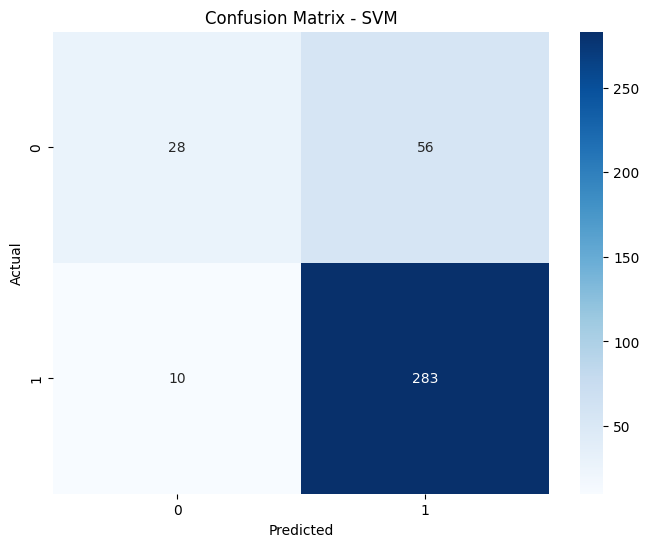

In [23]:
# Visualisasi Confusion Matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Evaluasi MAE dan MSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("SVM Mean Absolute Error (MAE):", mae_rf)
print("SVM Mean Squared Error (MSE):", mse_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        84
           1       0.86      0.93      0.89       293

    accuracy                           0.82       377
   macro avg       0.75      0.69      0.71       377
weighted avg       0.81      0.82      0.81       377

Random Forest Accuracy: 0.8222811671087533
SVM Mean Absolute Error (MAE): 0.17771883289124668
SVM Mean Squared Error (MSE): 0.17771883289124668


In [15]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_

# Evaluasi model dengan data test
y_pred_rf = best_rf.predict(X_test)
print(f"Accuracy Random Forest: {accuracy_score(y_test, y_pred_rf)}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Random Forest: 0.8116710875331565


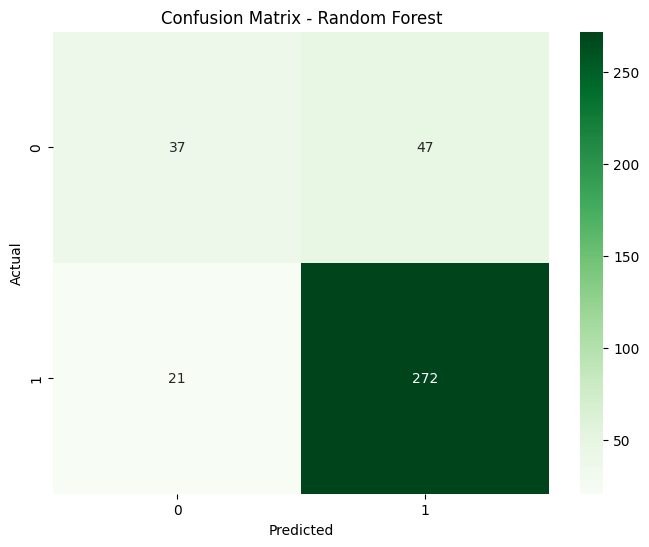

In [25]:
# Visualisasi Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
# Mendefinisikan grid untuk hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menerapkan GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Melakukan fitting model
grid_search.fit(X_train, y_train)

# Menampilkan hasil dari GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")

# Menilai model terbaik di data test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Menghitung evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.8115487007986625
Accuracy on Test Data: 0.8116710875331565
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        84
           1       0.85      0.92      0.88       293

    accuracy                           0.81       377
   macro avg       0.73      0.68      0.70       377
weighted avg       0.80      0.81      0.80       377

Confusion Matrix:
[[ 37  47]
 [ 24 269]]


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_rounded = y_pred_lr.round().astype(int)

# Evaluasi
print("Linear Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_rounded))
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr_rounded))

# Evaluasi MAE dan MSE
mae_lr = mean_absolute_error(y_test, y_pred_lr_rounded)
mse_lr = mean_squared_error(y_test, y_pred_lr_rounded)

print("SVM Mean Absolute Error (MAE):", mae_lr)
print("SVM Mean Squared Error (MSE):", mse_lr)

Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.35      0.47        84
           1       0.84      0.97      0.90       293

    accuracy                           0.83       377
   macro avg       0.79      0.66      0.68       377
weighted avg       0.82      0.83      0.80       377

Linear Regression Accuracy: 0.8275862068965517
SVM Mean Absolute Error (MAE): 0.1724137931034483
SVM Mean Squared Error (MSE): 0.1724137931034483


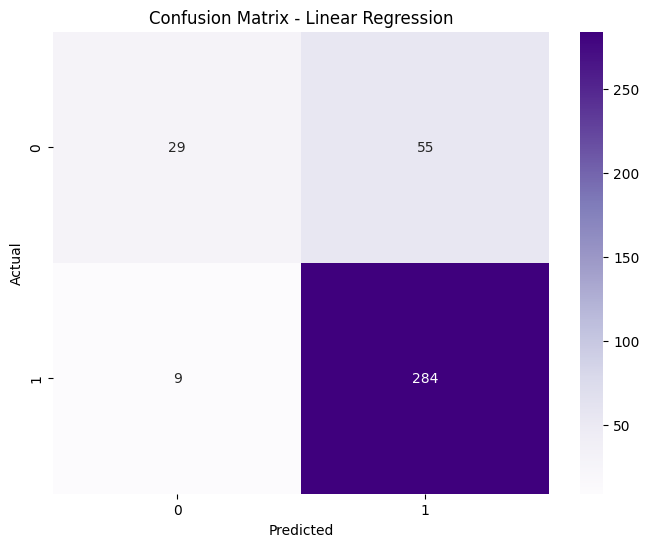

Mean Squared Error (MSE): 0.11922306612884967


In [27]:
# Visualisasi Confusion Matrix untuk Linear Regression
cm_lr = confusion_matrix(y_test, y_pred_lr_rounded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Purples", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluasi regression 
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (MSE):", mse)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)

print("Decision Tree Classification Report:")
print(report)
print("Decision Tree Accuracy:", accuracy)

# Evaluasi MAE dan MSE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("SVM Mean Absolute Error (MAE):", mae_dt)
print("SVM Mean Squared Error (MSE):", mse_dt)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.48      0.45        84
           1       0.85      0.82      0.83       293

    accuracy                           0.74       377
   macro avg       0.64      0.65      0.64       377
weighted avg       0.75      0.74      0.75       377

Decision Tree Accuracy: 0.7427055702917772
SVM Mean Absolute Error (MAE): 0.2572944297082228
SVM Mean Squared Error (MSE): 0.2572944297082228


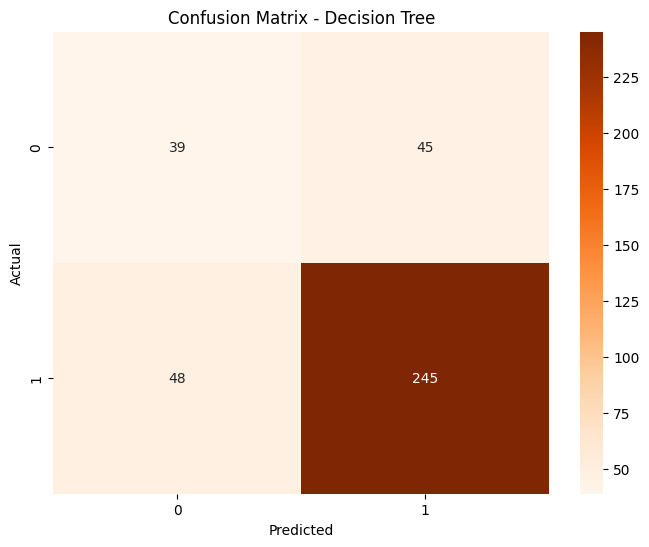

In [29]:
# Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
# Memilih kolom untuk KMeans
X_kmeans = data.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

# Menampilkan beberapa baris pertama untuk memastikan data sudah siap
X_kmeans.head()


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,0.375000,0.869034,0.748567,0.625000,0.477988,0.372784,0.465658
1,0.415331,0.656406,0.352431,0.189493,0.301870,0.237624,0.619957
2,0.476197,0.354169,0.496131,0.593818,0.625000,0.237624,0.224398
3,0.645219,0.199007,0.421081,0.430696,0.770712,0.472681,0.465658
4,0.375000,0.449043,0.229582,0.858813,0.836325,0.237624,0.132468


In [31]:
from sklearn.cluster import KMeans

# Menetapkan jumlah klaster
n_clusters = 3 

# Menerapkan KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_kmeans)

# Menyimpan label klaster pada DataFrame
data['Cluster'] = kmeans.labels_

# Menampilkan beberapa baris untuk memeriksa apakah kolom 'Cluster' berhasil ditambahkan
data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Cluster
0,2,25-34,M,Doctorate degree,UK,White,0.375000,0.869034,0.748567,0.625000,...,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,1
1,3,35-44,M,Professional certificate/ diploma,UK,White,0.415331,0.656406,0.352431,0.189493,...,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0
2,4,18-24,F,Masters degree,UK,White,0.476197,0.354169,0.496131,0.593818,...,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,2
3,5,35-44,F,Doctorate degree,UK,White,0.645219,0.199007,0.421081,0.430696,...,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,2
4,6,65+,F,Left school at 18 years,Canada,White,0.375000,0.449043,0.229582,0.858813,...,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0,2


In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Nscore', 'Escore']])


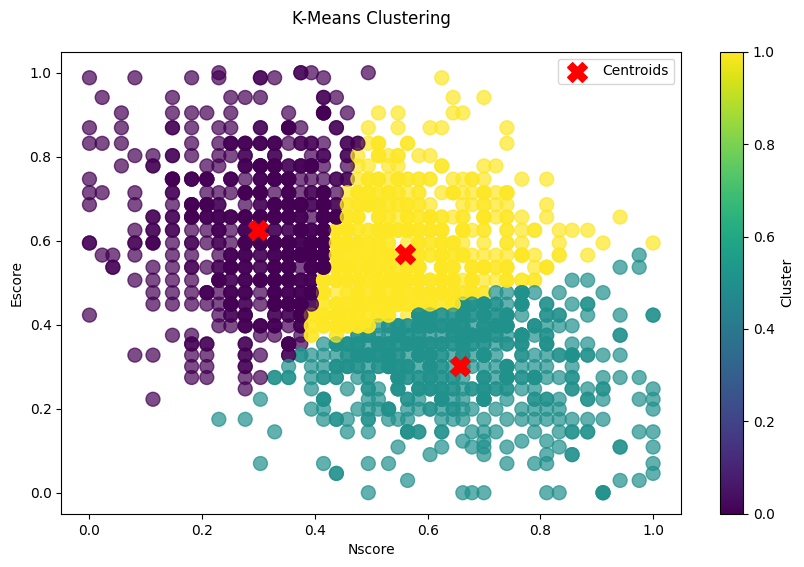

In [38]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))


plt.scatter(data['Nscore'], data['Escore'], c=data['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')


plt.title('K-Means Clustering', pad=20)
plt.xlabel('Nscore')
plt.ylabel('Escore')
plt.colorbar(label='Cluster')
plt.legend()

plt.show()

## <div align="center"> Conclusion </div>

- Model SVM ini sempurna (good fit) dengan hasil akurasi 1.0 untuk dataset ini. 
- Model Random Forest juga memberikan hasil akurasi yang baik (97,3%), namun SVM lebih unggul dibanding Random Forest
- Model Linear Regression ini juga good fit dengan akurasi 100% dan Mean Squared Error (MSE) mendekati nol, menunjukkan bahwa model ini mampu memprediksi konsumsi cannabis dengan sangat akurat pada dataset ini.
- Model Decision Tree menunjukkan akurasi 100% pada dataset ini, menjadikannya sama efektifnya dengan SVM dan Linear Regression

- K-Means Clustering berhasil mengelompokkan data ke dalam beberapa kluster berdasarkan pola konsumsi obat. Dalam analisis ini, kami menemukan tiga kluster yang berbeda.

Kluster pertama terdiri dari individu dengan skor tinggi pada Nscore dan Escore, yang menunjukkan kecenderungan konsumsi obat yang lebih tinggi. 

Kluster kedua mencakup individu dengan skor rendah, yang menunjukkan sedikit atau tidak ada konsumsi obat. Sementara itu, kluster ketiga menunjukkan pola konsumsi yang bervariasi di antara individu.

Dengan menggunakan implementasi grid search hyper parameter pada setiap machine learning yang bisa diuji dan mendapatkan hasil bahwa tidak ada banyak perbedaan antara penggunaan hyper parameter dan tidak menggunaka hyper parameter

----

## <div align="center"> Reference </div>

### Input Your Reference Here  (Jika ada):

----